When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 
The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Advertising.csv')
df  # it is linear regression problem

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [17]:
# UNnamed is not required, lets remove it
df.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [19]:
df.isnull().sum()   # there is no null

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [20]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [21]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

**In the preprocessing we can see there is no null and no string data available. We can start further**

In [22]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

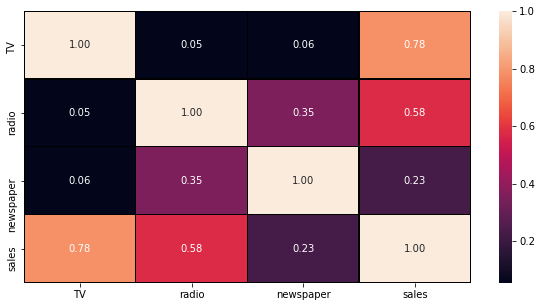

In [25]:
plt.figure(figsize=[10,5])
sns.heatmap(df.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

We can see that Sales is 78% related to TV hecce it is a good bond

We can see that Sales is 58% related to radio hence it is a good bond

We can see that sales is 23% related to newspaper hence it is a weak bond

In [24]:
df.shape

(200, 4)

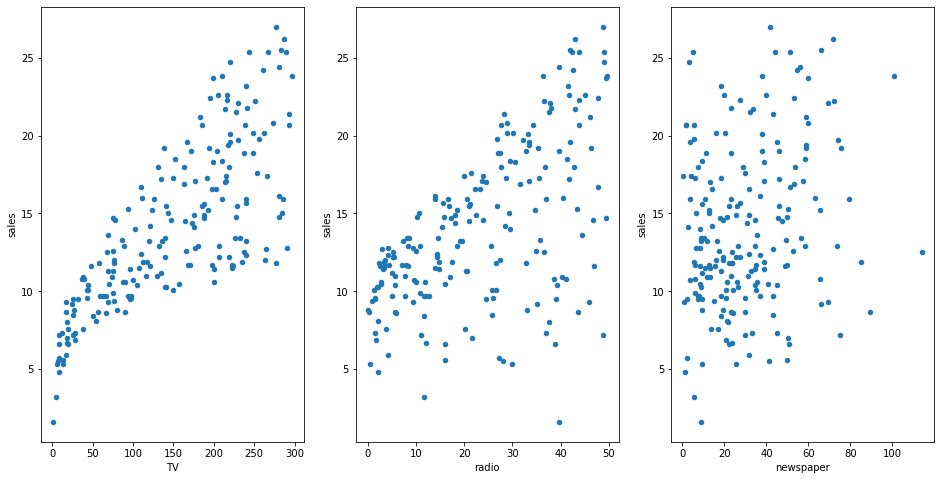

In [27]:
# Use scatter to see relationship between feature and label


fig, axs =plt.subplots(1,3)

df.plot(kind='scatter', x='TV', y='sales', ax=axs[0],figsize=(16,8))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])
fig.savefig('testdata.jpg')

Again we can see that TV and radion are showing the trend but newspaper is not showing the trend

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_v

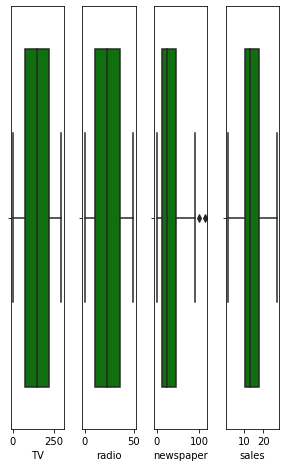

In [30]:
# check outliers
collist = df.columns.values
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()
    
import warnings
warnings.filterwarnings('ignore')

Except newspaper none has outliers.

In [32]:
# Checking the skewness , skewness threshold 0.5%, Hence only newspaper is skewed
df.skew()  

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

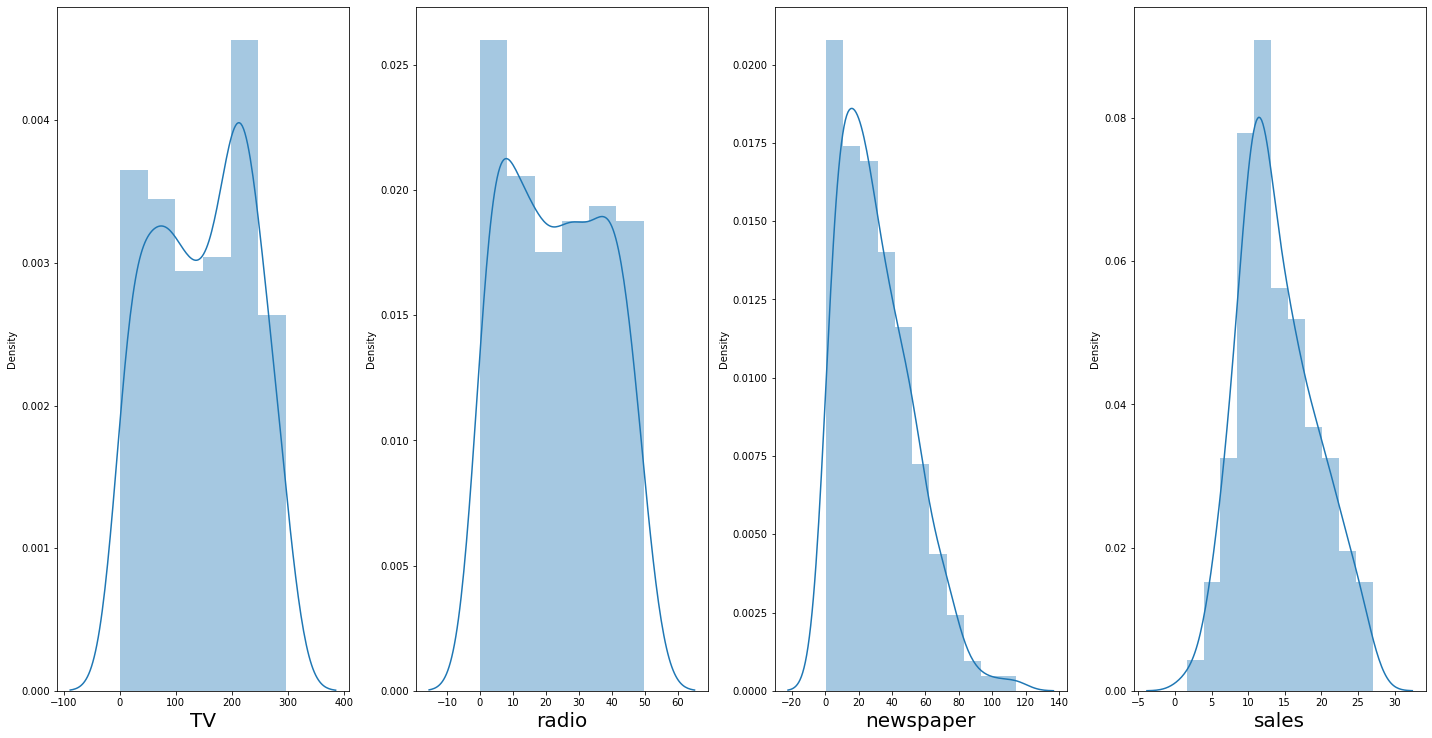

In [29]:
## Now we will see the data distribution using distplot

plt.figure(figsize=(20,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

data is not normalized

Because data is very less we will not remove the outliers

**Divide feature and target**

In [42]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [34]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [35]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

**Scale the data**

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xscaled = sc.fit_transform(x)
xscaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [45]:
# Split data into train and test. Model will be built on training data and tested on test data.
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(xscaled, y, test_size = 0.25, random_state=323)
y_train.head()

7      13.2
106     7.2
17     24.4
105    19.2
43     12.9
Name: sales, dtype: float64

In [47]:
# Model training
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

### Predict the sales

In [48]:
df.tail(2)

,TV,radio,newspaper,sales
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [52]:
print('sales  is :',regression.predict(sc.transform([[283.6, 42.0, 66.2]])))

sales  is : [1260.18162608]


In [53]:
# Saving the model in the local file
import pickle
filename = 'Salespredict.pickle'
pickle.dump(regression,open(filename,'wb'))

In [56]:
# Predict the Sales using hte saved model
loaded_model = pickle.load(open(filename,'rb'))
a =  loaded_model.predict(sc.transform([[248,200,123]]))
a

array([1547.28537594])

Here we have predicted the sales for a random feature data 248 tv; 200 radio; 123 newspaper

In [57]:
# Calculate the adjusted r2 score on training data
regression.score(x_train,y_train)

0.9033833434621268

**To see whether model fit the test data, we will conduct the check on test data**

In [58]:
regression.score(x_test, y_test)

0.8682685177733757

In [61]:
# Plot and visualise the predition score of all the test data
y_pred = regression.predict(x_test)
y_pred

array([13.30803697, 21.84581628, 15.84839027, 12.32271055, 10.12858549,
       21.38387548, 16.50864847, 10.32432842, 10.37053461,  9.76140704,
       17.71922292, 12.54124214, 13.72515691, 15.54511582,  4.60618944,
       12.09936495, 13.00997456, 21.03673585, 12.94258751, 12.56200182,
       15.42002646, 12.77639852, 15.40409129, 14.31318442, 12.05251856,
       23.27623181, 18.84168052, 14.990027  ,  6.72618073, 10.27164579,
        8.22092547, 14.89043169, 19.4044605 , 14.29273731, 18.23073952,
       16.41285611,  3.7503725 , 10.72488573, 14.98273367, 15.39984147,
       17.85537631, 20.75916848, 18.24261189, 24.01277072,  7.991675  ,
       18.94597666, 15.19081423, 16.87551094, 18.05026005, 11.40266626])

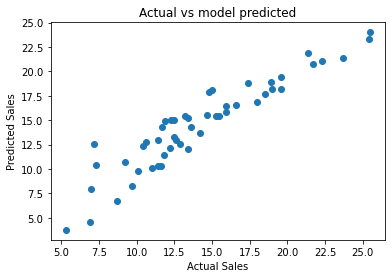

In [62]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs model predicted')
plt.show()